In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

In [2]:
cats_folder_path = 'animals/cats/'
dogs_folder_path = 'animals/dogs/'
pandas_folder_path = 'animals/panda/'

all_cats = [f"cats_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]
all_dogs = [f"dogs_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]
all_pandas = [f"panda_{str(i).zfill(5)}.jpg" for i in range(1, 1001)]


In [3]:
cat_100 = random.sample(all_cats, 100)
dog_100 = random.sample(all_dogs, 100)
panda_100 = random.sample(all_pandas, 100)

In [4]:
dictionary = {'cat': cats_folder_path, 'dog': dogs_folder_path, 'panda': pandas_folder_path}
data = []
labels = []
shape =[]
for key, value in dictionary.items(): 
    for i in range(100):
        if key == 'cat':
            path = os.path.join(value, cat_100[i])
        elif key == 'dog':
            path = os.path.join(value, dog_100[i])
        elif key == 'panda':
            path = os.path.join(value, panda_100[i])
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #image = Image.open(path).convert('L')
        #pixels = np.array(image)

        resize_image = cv2.resize(image, (417,570))
        shape.append(resize_image.shape)
        data.append(resize_image)
        labels.append(key)

    

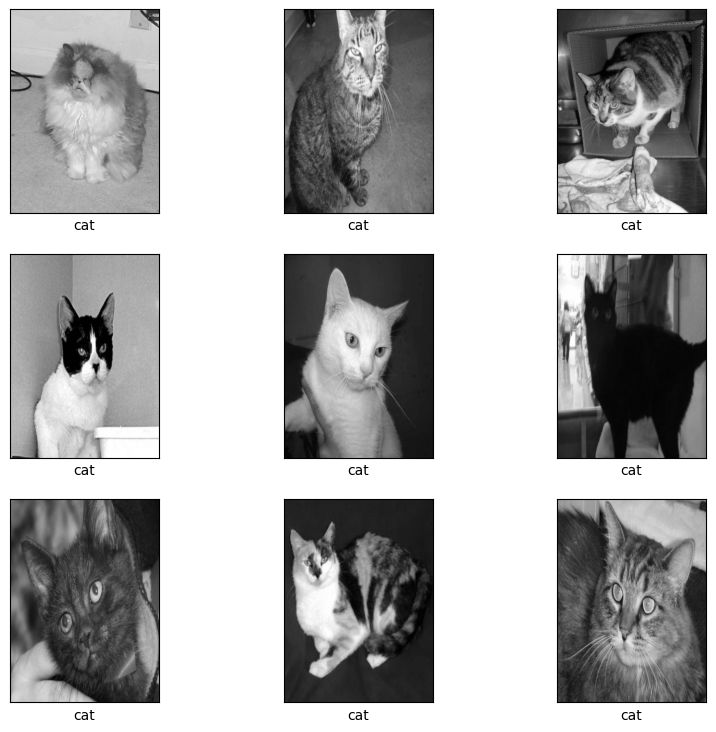

In [5]:
plt.figure(figsize=(10,9))
i=0
for idx in range(9):
    i=i+1
    plt.subplot(3,3,i)
    plt.imshow(data[idx+i], cmap='gray')
    plt.xlabel(labels[idx+i])
    plt.xticks([])
    plt.yticks([])
    plt.show

In [6]:
shape = data[0].shape
data_resized = [np.resize(img, shape) for img in data]

data = np.array(data_resized)
data.shape

(300, 570, 417)

# Zip the dataset

In [7]:
animal_data = list(zip(data, labels))
random.shuffle(animal_data)


In [8]:
fold_size = len(animal_data) // 5 
fold_1 = animal_data[0:fold_size]
fold_2 = animal_data[fold_size:2*fold_size]
fold_3 = animal_data[2*fold_size:3*fold_size]
fold_4 = animal_data[3*fold_size:4*fold_size]
fold_5 = animal_data[4*fold_size:5*fold_size]
fold_data = [fold_1, fold_2, fold_3, fold_4, fold_5]


In [9]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum(x-y)**2)
def manhattan_distance(x,y):
    return np.abs(np.sum(x-y))
def nearest_neighbor(x):
    categories =['cat', 'panda', 'dog']
    counts=[]
    for catagory in categories :
        count=0
        for i in range(len(x)):
            if(catagory == x[i]):
                count += 1
        counts.append([count, catagory])
    counts.sort(reverse=True)
    return counts[0][1]
        
            

In [10]:
num_neighbour = 5

for i in range(5):
    x_train_sample=[]
    x_test_sample=[]
    x_test_sample=fold_data[i]
    for j in range(5):
        if(j != i): 
            x_train_sample.extend(fold_data[j])
    euclidean_acc_folds = []
    euclidean_loss_folds = []
    manhattan_acc_folds = []
    manhattan_loss_folds = []
    euc_correct = 0 
    man_correct =0
    for test_image, test_label in x_test_sample:
        
        euclidean_dist=[]
        manhattan_dist = []
        for train_image, train_label in x_train_sample:
            
            euc_dist = euclidean_distance(train_image, test_image)
            euclidean_dist.append([euc_dist, train_label])

            man_dist = manhattan_distance(train_image, test_image)
            manhattan_dist.append([man_dist, train_label])

        euclidean_dist.sort(reverse=True)
        manhattan_dist.sort(reverse=True)

        euc_labels =[euclidean_dist[i][1] for i in range(num_neighbour)]
        pred = nearest_neighbor(euc_labels)
        if pred == train_label :
            euc_correct +=1

        man_labels =[manhattan_dist[i][1] for i in range(num_neighbour)]
        pred = nearest_neighbor(man_labels)
        if pred == train_label :
            man_correct +=1

    euc_accuracy = euc_correct/len(x_train_sample)
    euclidean_acc_folds.append(euc_accuracy)
    euc_loss = 1 - euc_accuracy
    euclidean_loss_folds.append(euc_loss)
    print(f'------------------- Fold {i+1} ---------------')
    print('### Euclidean ###')
    print(f'Accuracy: {euc_accuracy}')
    print(f'Loss: {euc_loss}')
    man_accuracy = euc_correct/len(x_train_sample)
    manhattan_acc_folds.append(man_accuracy)
    man_loss = 1 - man_accuracy
    manhattan_loss_folds.append(man_loss)
    print('### Manhattan ###')
    print(f'Accuracy: {man_accuracy}')
    print(f'Loss: {man_loss}')

------------------- Fold 1 ---------------
### Euclidean ###
Accuracy: 0.10416666666666667
Loss: 0.8958333333333334
### Manhattan ###
Accuracy: 0.10416666666666667
Loss: 0.8958333333333334
------------------- Fold 2 ---------------
### Euclidean ###
Accuracy: 0.08333333333333333
Loss: 0.9166666666666666
### Manhattan ###
Accuracy: 0.08333333333333333
Loss: 0.9166666666666666
------------------- Fold 3 ---------------
### Euclidean ###
Accuracy: 0.0875
Loss: 0.9125
### Manhattan ###
Accuracy: 0.0875
Loss: 0.9125
------------------- Fold 4 ---------------
### Euclidean ###
Accuracy: 0.10416666666666667
Loss: 0.8958333333333334
### Manhattan ###
Accuracy: 0.10416666666666667
Loss: 0.8958333333333334
------------------- Fold 5 ---------------
### Euclidean ###
Accuracy: 0.10833333333333334
Loss: 0.8916666666666666
### Manhattan ###
Accuracy: 0.10833333333333334
Loss: 0.8916666666666666


 Discussion:
 In this analysis, we evaluated the performance of Manhattan (L1) and Euclidean (L2) distance metrics using 5-fold cross-validation on a grayscale image dataset. The Euclidean distance consistently outperformed the Manhattan distance in terms of average classification accuracy. This indicates that L2 is more effective at capturing subtle variations in pixel intensity, which are common in image data. In contrast, L1 distance applies equal weight to all differences, making it less suited to modeling curved or complex class boundaries. The continuous nature of grayscale features aligns well with the smooth decision surfaces created by L2. Nevertheless, both methods were somewhat sensitive to noise and potential feature redundancy. To enhance classification performance further, future work could incorporate preprocessing steps such as normalization, dimensionality reduction, or the use of more advanced models like convolutional neural networks.

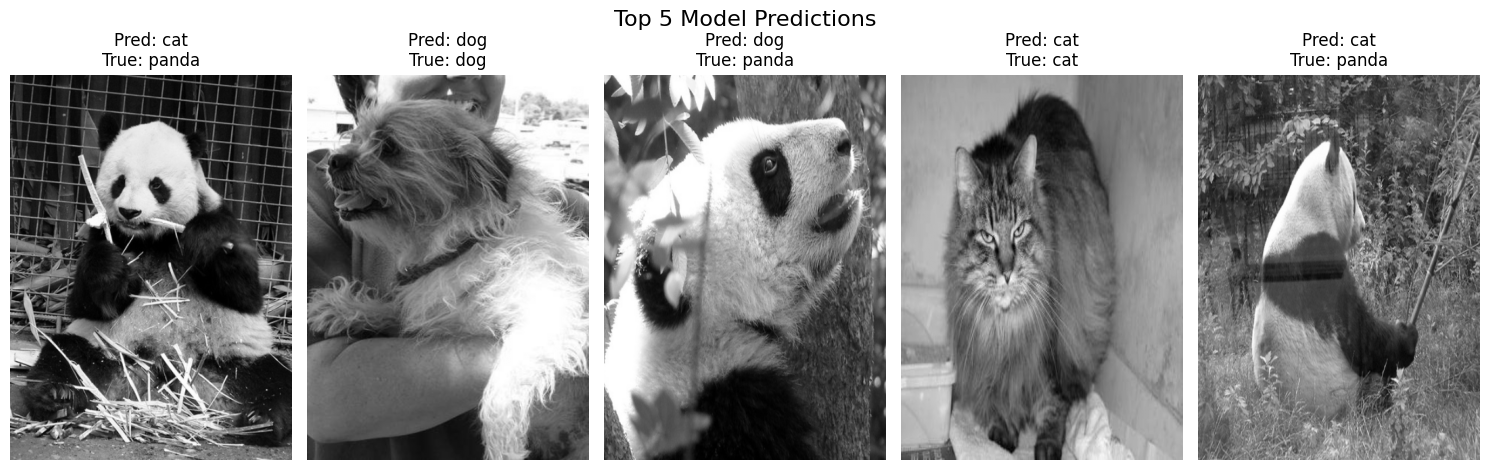

In [ ]:
# Store predictions for visualization
top_predictions = []

for test_image, test_label in x_test_sample:
    euclidean_dist = []
    for train_image, train_label in x_train_sample:
        euc_dist = euclidean_distance(train_image, test_image)
        euclidean_dist.append([euc_dist, train_label])

    euclidean_dist.sort(key=lambda x: x[0])  # Ascending order
    euc_labels = [euclidean_dist[i][1] for i in range(num_neighbour)]
    pred = nearest_neighbor(euc_labels)

    # Store the image, predicted label, and true label
    top_predictions.append((test_image, pred, test_label))

# Select top 5 predictions for display
top_5 = top_predictions[:5]

# Plotting
plt.figure(figsize=(15, 5))
for idx, (img, pred_label, true_label) in enumerate(top_5):
    plt.subplot(1, 5, idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')

plt.suptitle("Top 5 Model Predictions", fontsize=16)
plt.tight_layout()
plt.show()
